In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/realpython/python-data-cleaning/master/Datasets/BL-Flickr-Images-Book.csv")
df.head()

,Identifier,Edition Statement,Place of Publication,Date of Publication,Publisher,Title,Author,Contributors,Corporate Author,Corporate Contributors,Former owner,Engraver,Issuance type,Flickr URL,Shelfmarks
0,206,NaN,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,"FORBES, Walter.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12641.b.30.
1,216,NaN,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12626.cc.2.
2,218,NaN,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.","BLAZE DE BURY, Marie Pauline Rose - Baroness",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 12625.dd.1.
3,472,NaN,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.","Appleyard, Ernest Silvanus.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 10369.bbb.15.
4,480,"A new edition, revised, etc.",London,1857,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.","BROOME, John Henry.",NaN,NaN,NaN,NaN,monographic,http://www.flickr.com/photos/britishlibrary/ta...,British Library HMNTS 9007.d.28.


In [13]:
to_drop = ['Edition Statement',
           'Corporate Author',
           'Corporate Contributors',
           'Former owner',
           'Engraver',
           'Contributors',
           'Issuance type',
           'Shelfmarks']

df.drop(to_drop, inplace=True, axis=1) #removing columns that dont give much info
#df.drop(columns=to_drop, inplace=True) 
df.head()

,Identifier,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
0,206,London,1879 [1878],S. Tinsley & Co.,Walter Forbes. [A novel.] By A. A,A. A.,http://www.flickr.com/photos/britishlibrary/ta...
1,216,London; Virtue & Yorston,1868,Virtue & Co.,All for Greed. [A novel. The dedication signed...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
2,218,London,1869,"Bradbury, Evans & Co.",Love the Avenger. By the author of “All for Gr...,"A., A. A.",http://www.flickr.com/photos/britishlibrary/ta...
3,472,London,1851,James Darling,"Welsh Sketches, chiefly ecclesiastical, to the...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...
4,480,London,1857,Wertheim & Macintosh,"[The World in which I live, and my place in it...","A., E. S.",http://www.flickr.com/photos/britishlibrary/ta...


In [1]:
df["Identifier"].is_unique #checks for duplicate values

NameError: name 'df' is not defined

In [1]:
df = df.set_index('Identifier',inplace=True) #replacing the existing index with the column 'Identifier' using set_index:
df.head()
df.loc[206] #loc[] in pandas returns the information based on specific index

NameError: name 'df' is not defined

In [2]:
df.head()

NameError: name 'df' is not defined

In [31]:
df.loc[480]

Place of Publication                                               London
Date of Publication                                                  1857
Publisher                                            Wertheim & Macintosh
Title                   [The World in which I live, and my place in it...
Author                                                          A., E. S.
Flickr URL              http://www.flickr.com/photos/britishlibrary/ta...
Name: 480, dtype: object

In [39]:
df.dtypes #get to know all the data types

Place of Publication    object
Date of Publication     object
Publisher               object
Title                   object
Author                  object
Flickr URL              object
dtype: object

In [40]:
df.dtypes.value_counts()  #get to know the total count of data types

object    6
dtype: int64

In [47]:
df['Date of Publication'].head(10) #accesing a specific column
df.loc[1905:, 'Date of Publication'].head(10) #accesing a specific column with specific condition


Identifier
1905           1888
1929    1839, 38-54
2836           1897
2854           1865
2956        1860-63
2957           1873
3017           1866
3131           1899
4598           1814
4884           1820
Name: Date of Publication, dtype: object

In [48]:
extr = df['Date of Publication'].str.extract(r'^(\d{4})', expand=False) #cleaning data from multiple dates to one date
extr.head()

Identifier
206    1879
216    1868
218    1869
472    1851
480    1857
Name: Date of Publication, dtype: object

In [49]:
df['Date of Publication'] = pd.to_numeric(extr) #converting from object to float type.
df['Date of Publication']

Identifier
206        1879.0
216        1868.0
218        1869.0
472        1851.0
480        1857.0
            ...  
4158088    1838.0
4158128    1831.0
4159563       NaN
4159587    1834.0
4160339    1834.0
Name: Date of Publication, Length: 8287, dtype: float64

In [132]:
list2 = [[0,1,2], [3,4,5], [6,7,8]]
arr2d = np.array(list2,dtype="float") #n dimensional array with specified data type
arr2d.astype(int) #converting from float to int
arr2b = np.array([1,0,1],dtype=bool)
arr2b


array([ True, False,  True])

In [56]:
d = np.empty_like(a)
d

array([[          6,           0, -1963261072],
       [        393,           0,           0]])

In [131]:
b = [1,2,3]
c = np.array(b) #python list to numpy array
c
c.tolist() #Convert an array back to a list
print(type(c))

<class 'numpy.ndarray'>


In [68]:
b =np.array([1,2,3])
shape =(3,3)
d = np.ones(shape)
e = np.zeros(shape) #customized array with 1s and 0s
d,e


(array([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]), array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]))

In [81]:
a = np.asarray([[1,1,2,3,4], # 1st row #multidimensional array
               [2,6,7,8,9], # 2nd row
               [3,6,7,8,9], # 3rd row
               [4,6,7,8,9], # 4th row
               [5,6,7,8,9]  # 5th row
             ])

x =a[1:4:2] #slicing 
x

array([[2, 6, 7, 8, 9],
       [4, 6, 7, 8, 9]])

In [98]:
a = np.array([1, 2, 3])
b = np.array([5, 6,8])
print(np.concatenate([a,b]))#adding 2 1d arrays
print(np.append(a, b))#appends at the last of the array
print(np.hstack([a, b])) #stacking array elements horizontally #make sure the shape is same for both arrays
print(np.vstack([a, b])) #stacking array elements vertically

[1 2 3 5 6 8]
[1 2 3 5 6 8]
[1 2 3 5 6 8]
[[1 2 3]
 [5 6 8]]


In [90]:
a2 = np.array([[1, 2], [7, 8]])
a3 = np.array([[3, 4], [4, 6]]) #nd array
print (np.concatenate((a2,a3), axis=0)) #adding across rows
print (np.concatenate((a2,a3), axis=1)) #adding across colums

[[1 2]
 [7 8]
 [3 4]
 [4 6]]
[[1 2 3 4]
 [7 8 4 6]]


In [172]:
b = np.array([5, 6,8])
print(b.min()) #minimum
print(b.max()) #maximum
print(b.sum()) #sum
print(np.sqrt(b)) #square root
print(np.std(b)) #standard deviation
print(np.mean(b))
print("Column wise minimum: ", np.amin(arr2, axis=0))
print("Row wise minimum: ", np.amin(arr2, axis=1))


5
8
19
[2.23606798 2.44948974 2.82842712]
1.247219128924647
6.333333333333333
Column wise minimum:  [ 1. -1. -1.  4.]
Row wise minimum:  [ 1. -1.  5.]


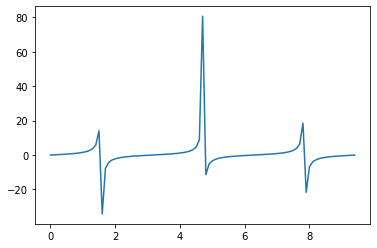

In [109]:
x= np.arange(0,3*np.pi,0.1)

y=np.tan(x)

plt.plot(x,y)

plt.show() #plot the tan function:

In [139]:
list2 = [[1, 2, 3, 4],[3, 4, 5, 6], [5, 6, 7, 8]]
arr2 = np.array(list2, dtype='float')
arr2
arr2.shape #shape of array
arr2.dtype #types of elements
arr2.size #size is total no. of elements
arr2.ndim #no. of dimensions


array([[1., 2., 3., 4.],
       [3., 4., 5., 6.],
       [5., 6., 7., 8.]])

In [145]:
# numpy arrays can optionally accept as many parameters in the square brackets as there is number of dimensions.
arr2[:3,:3] # Extract the first 3 rows and 3 columns

array([[1., 2., 3.],
       [3., 4., 5.],
       [5., 6., 7.]])

In [154]:
b = arr2 * 4 #whatever the operation is it gets applied to each element
c = arr2 > 4 # Get the boolean output by applying the condition to each element
b,c


(array([[ 4.,  8., 12., 16.],
        [12., 16., 20., 24.],
        [20., 24., 28., 32.]]), array([[False, False, False, False],
        [False, False,  True,  True],
        [ True,  True,  True,  True]]))

In [163]:
arr3 = np.array(list2,dtype=int)
arr3[::-1, ] # Reverse only the row positions
arr2[::-1, ::-1]# Reverse the row and column positions


array([[8., 7., 6., 5.],
       [6., 5., 4., 3.],
       [4., 3., 2., 1.]])

In [167]:
# Missing values can be represented using np.nan object, while np.inf represents infinite.
# Insert a nan and an inf
arr2[1,1] = np.nan  # not a number
arr2[1,2] = np.inf  # infinite
# Replace nan and inf with -1. Don't use arr2 == np.nan
missing_bool = np.isnan(arr2) | np.isinf(arr2)
arr2[missing_bool] = -1  
arr2


array([[ 1.,  2.,  3.,  4.],
       [ 3., -1., -1.,  6.],
       [ 5.,  6.,  7.,  8.]])

In [175]:
# create a new array from an existing array
# Assign portion of arr2 to arr2a. Doesn't really create a new array.
arr2a = arr2[:2,:2]  
arr2a[:1, :1] = 100  # 100 will reflect in arr2
arr2


array([[100.,   2.,   3.,   4.],
       [  3.,  -1.,  -1.,   6.],
       [  5.,   6.,   7.,   8.]])

In [178]:
# Copy portion of arr2 to arr2b
arr2b = arr2[:2, :2].copy()
arr2b[:1, :1] = 101  # 101 will not reflect in arr2
arr2b
arr2

array([[100.,   2.,   3.,   4.],
       [  3.,  -1.,  -1.,   6.],
       [  5.,   6.,   7.,   8.]])

In [179]:
# Reshape a 3x4 array to 4x3 array
arr2.reshape(4, 3)

array([[100.,   2.,   3.],
       [  4.,   3.,  -1.],
       [ -1.,   6.,   5.],
       [  6.,   7.,   8.]])

In [186]:
# Flatten it to a 1d array
arr2.flatten()
# Changing the flattened array does not change parent
b1 = arr2.flatten()  
b1[0] = 103  # changing b1 does not affect arr2
arr2

array([[100.,   2.,   3.,   4.],
       [  3.,  -1.,  -1.,   6.],
       [  5.,   6.,   7.,   8.]])

In [195]:
# Changing the raveled array changes the parent also.
b2 = arr2.ravel()  
b2[0] = 101  # changing b2 changes arr2 also
arr2

array([[101.,   2.,   3.,   4.],
       [  3.,  -1.,  -1.,   6.],
       [  5.,   6.,   7.,   8.]])

In [196]:
# Lower limit is 0 be default
print(np.arange(5)) #generates a specific sequence of numbers
# 0 to 9
print(np.arange(0, 10))  

# 0 to 9 with step of 2
print(np.arange(0, 10, 2))  

# 10 to 1, decreasing order
print(np.arange(10, 0, -1))
# Start at 1 and end at 50
np.linspace(start=1, stop=50, num=10, dtype=int) #used in cases where we dont know the step value
# Limit the number of digits after the decimal to 2
np.set_printoptions(precision=2)  
# Start at 10^1 and end at 10^50
np.logspace(start=1, stop=50, num=10, base=10) 

[0 1 2 3 4]
[0 1 2 3 4 5 6 7 8 9]
[0 2 4 6 8]
[10  9  8  7  6  5  4  3  2  1]


array([1.00e+01, 2.78e+06, 7.74e+11, 2.15e+17, 5.99e+22, 1.67e+28,
       4.64e+33, 1.29e+39, 3.59e+44, 1.00e+50])

In [197]:
# The np.zeros and np.ones functions lets you create arrays of desired shape where all the items are either 0’s or 1’s.
np.zeros([2,2])
np.ones([2,2])

array([[1., 1.],
       [1., 1.]])

In [198]:
# np.tile will repeat a whole list or array n times. Whereas, np.repeat repeats each item n times.
a = [1,2,3] 

# Repeat whole of 'a' two times
print('Tile:   ', np.tile(a, 2))

# Repeat each element of 'a' two times
print('Repeat: ', np.repeat(a, 2))

Tile:    [1 2 3 1 2 3]
Repeat:  [1 1 2 2 3 3]


In [199]:
#generating random numbers
# Random numbers between [0,1) of shape 2,2
print(np.random.rand(2,2))

# Normal distribution with mean=0 and variance=1 of shape 2,2
print(np.random.randn(2,2))

# Random integers between [0, 10) of shape 2,2
print(np.random.randint(0, 10, size=[2,2]))

# One random number between [0,1)
print(np.random.random())

# Random numbers between [0,1) of shape 2,2
print(np.random.random(size=[2,2]))

# Pick 10 items from a given list, with equal probability
print(np.random.choice(['a', 'e', 'i', 'o', 'u'], size=10))  

# Pick 10 items from a given list with a predefined probability 'p'
print(np.random.choice(['a', 'e', 'i', 'o', 'u'], size=10, p=[0.3, .1, 0.1, 0.4, 0.1]))  # picks more o's



[[0.84 0.8 ]
 [0.17 0.89]]
[[ 0.54 -0.02]
 [-0.32 -0.23]]
[[6 0]
 [5 9]]
0.073575059690695
[[0.07 0.32]
 [0.48 0.88]]
['u' 'u' 'e' 'e' 'o' 'e' 'u' 'e' 'o' 'o']
['o' 'a' 'i' 'a' 'a' 'u' 'a' 'u' 'o' 'a']


In [201]:
# Create the random state
rn = np.random.RandomState(100)

# Create random numbers between [0,1) of shape 2,2
print(rn.rand(2,2))
# Set the random seed
np.random.seed(100)

# Create random numbers between [0,1) of shape 2,2
print(np.random.rand(2,2))

[[0.54 0.28]
 [0.42 0.84]]
[[0.54 0.28]
 [0.42 0.84]]


In [203]:
# Create random integers of size 10 between [0,10)
np.random.seed(100)
arr_rand = np.random.randint(0, 10, size=10)
print(arr_rand)
# Get the unique items and their counts
uniqs, counts = np.unique(arr_rand, return_counts=True)
print("Unique items : ", uniqs)
print("Counts       : ", counts)


[8 8 3 7 7 0 4 2 5 2]
Unique items :  [0 2 3 4 5 7 8]
Counts       :  [1 2 1 1 1 2 2]
